Operations:
1. sin
2. cos
3. tan
4. done


Enter operation:  1
Enter amplitude:  1
Enter frequency:  1


Operations:
1. sin
2. cos
3. tan
4. done


Enter operation:  2
Enter amplitude:  2
Enter frequency:  2


Operations:
1. sin
2. cos
3. tan
4. done


Enter operation:  4


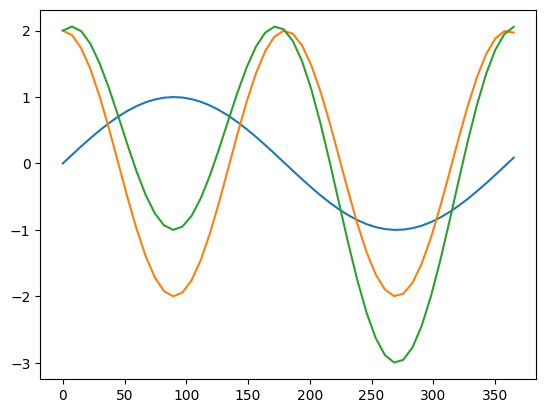

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from enum import Enum

total_degrees = np.linspace(0, 365)
theta = np.radians(total_degrees)

class Function(Enum):
  SIN = 1
  COS = 2
  TAN = 3

class Instruction:
  def __init__(self, function: Function , amplitude: float, frequency: float):
    self.function = Function(function)
    self.amplitude = amplitude
    self.frequency = frequency
  
  def __repr__(self):
    result = ""
    result += "Instruction Object {\n"
    result += "Function: " + str(self.function) + "\n"
    result += "Amplitude: " + str(self.amplitude) + "\n"
    result += "Frequency: " + str(self.frequency) + "\n"
    result += "}"
    return result
  
  def validate(self):
    if self.function not in [Function.SIN, Function.COS, Function.TAN]:
      return False
    return True
  
  def execute(self):
    global theta
    results = []
    match self.function:
      case Function.SIN:
        results.append(np.sin(theta * self.frequency) * self.amplitude)
      case Function.COS:
        results.append(np.cos(theta * self.frequency) * self.amplitude)
      case Function.TAN:
        results.append(np.tan(theta * self.frequency) * self.amplitude)
      case _:
        return False
    return results

instructions = []
option = 0
while option != 4:
  if option > 4:
    print("Invalid option: Out of range")
    continue
  elif option < 0:
    print("Invalid option: Out of range")
    continue
  
  if option != 0:
    try:
      amplitude = int(input("Enter amplitude: "))
      frequency = int(input("Enter frequency: "))
    except ValueError:
      print("Invalid number: Not a number")
    instructions.append(Instruction(option, amplitude, frequency))
  
  try:
    print("Operations:")
    print("1. sin")
    print("2. cos")
    print("3. tan")
    print("4. done")
    option = int(input("Enter operation: "))
  except ValueError:
    print("Invalid option: Not a number")
    continue

results = []
for instruction in instructions:
    results = results + instruction.execute()

summed = np.add(np.linspace(1, 50), np.linspace(-1, -50))
for result in results:
    plt.plot(total_degrees, result)
    summed = np.add(result, summed)

plt.plot(total_degrees, summed)

plt.show()